In [1]:
#import

import pandas as pd
from IPython.display import display
from data_crawler import crawl_reviews
from text_processor import process_reviews
from sentiment_model import SentimentAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import random

In [2]:
# Fungsi untuk reproducibility

def set_seed(seed_value=42):
    """Mengatur seed untuk reproducibility."""
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
print("Seed untuk reproducibility telah diatur.")

Seed untuk reproducibility telah diatur.


In [3]:
# Konfigurasi

APP_TO_ANALYZE = {'id': 'gov.dukcapil.mobile_id', 'name': 'Identitas Kependudukan Digital'}
INITIAL_CRAWL_TARGET = 20000
BALANCE_RATIO = 0.4
TRAINING_EPOCHS = 4
STRATEGIES = ['none', 'undersample', 'oversample', 'hybrid']

In [4]:
# Pengumpulan dan Pemrosesan Data

app_id, app_name = APP_TO_ANALYZE['id'], APP_TO_ANALYZE['name']
csv_path = f"{app_id}_reviews.csv"
try:
    df_raw = pd.read_csv(csv_path)
    print(f"File '{csv_path}' ditemukan, memuat data lokal.")
except FileNotFoundError:
    df_raw = crawl_reviews(app_id=app_id, target_count=INITIAL_CRAWL_TARGET)

File 'gov.dukcapil.mobile_id_reviews.csv' ditemukan, memuat data lokal.


In [5]:
# Training dan Evaluasi

all_evaluation_results = {}
for strategy in STRATEGIES:
    print(f"\n{'='*70}\nMENJALANKAN EKSPERIMEN DENGAN STRATEGI: {strategy.upper()} 🔬\n{'='*70}\n")
    
    processed_data = process_reviews(
        df_raw, 
        balancing_strategy=strategy, 
        balance_ratio=BALANCE_RATIO
    )
    
    analyzer = SentimentAnalyzer(batch_size=32)
    analyzer.prepare_dataloaders(processed_data)
    history = analyzer.train(epochs=TRAINING_EPOCHS)
    
    model_save_path = f"models/{app_name.lower()}_{strategy}.pt"
    analyzer.save_model(model_save_path)
    
    results = analyzer.evaluate()
    all_evaluation_results[strategy] = results
    
print("\nSemua eksperimen selesai.")


MENJALANKAN EKSPERIMEN DENGAN STRATEGI: NONE 🔬

Memulai pemrosesan data...
Tanpa penyeimbangan data. Menggunakan dataset asli (imbalanced).

Distribusi kelas final:
label
0    14332
1     5668
Name: count, dtype: int64
Total data akhir yang akan digunakan untuk training: 20000 ulasan.
Pemrosesan data selesai.
Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 16000, Test: 4000).
🏋️ Memulai training untuk 4 epoch...
Epoch 1/4 | Training Loss: 0.2346 | Validation Loss: 0.2099
Epoch 2/4 | Training Loss: 0.1771 | Validation Loss: 0.2195
Epoch 3/4 | Training Loss: 0.1338 | Validation Loss: 0.2268
Epoch 4/4 | Training Loss: 0.0988 | Validation Loss: 0.2641
Training selesai.
Model berhasil disimpan di: models/identitas kependudukan digital_none.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9220 | F1-Score (Macro): 0.9047


MENJALANKAN EKSPERIMEN DENGAN STRATEGI: UNDERSAMPLE 🔬

Memulai pemrosesan data...
Menjalankan strategi: Undersampling Murni...

Distribusi kelas final:
label
0    5668
1    5668
Name: count, dtype: int64
Total data akhir yang akan digunakan untuk training: 11336 ulasan.
Pemrosesan data selesai.
Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 9068, Test: 2268).
🏋️ Memulai training untuk 4 epoch...
Epoch 1/4 | Training Loss: 0.2934 | Validation Loss: 0.2427
Epoch 2/4 | Training Loss: 0.2115 | Validation Loss: 0.2344
Epoch 3/4 | Training Loss: 0.1564 | Validation Loss: 0.2592
Epoch 4/4 | Training Loss: 0.1115 | Validation Loss: 0.3279
Training selesai.
Model berhasil disimpan di: models/identitas kependudukan digital_undersample.pt

--- Hasil Evaluasi --- 
Akurasi: 0.8814 | F1-Score (Macro): 0.8814


MENJALANKAN EKSPERIMEN DENGAN STRATEGI: OVERSAMPLE 🔬

Memulai pemrosesan data...
Menjalankan strategi: Oversampling Murni...

Distribusi kelas final:
label
1    14332
0    14332
Name: count, dtype: int64
Total data akhir yang akan digunakan untuk training: 28664 ulasan.
Pemrosesan data selesai.
Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 22931, Test: 5733).
🏋️ Memulai training untuk 4 epoch...
Epoch 1/4 | Training Loss: 0.2424 | Validation Loss: 0.1840
Epoch 2/4 | Training Loss: 0.1439 | Validation Loss: 0.1417
Epoch 3/4 | Training Loss: 0.0856 | Validation Loss: 0.1442
Epoch 4/4 | Training Loss: 0.0629 | Validation Loss: 0.1553
Training selesai.
Model berhasil disimpan di: models/identitas kependudukan digital_oversample.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9599 | F1-Score (Macro): 0.9599


MENJALANKAN EKSPERIMEN DENGAN STRATEGI: HYBRID 🔬

Memulai pemrosesan data...
Menjalankan strategi: Hybrid Sampling (Target Rasio: 0.4)...
 -> Kelas minoritas (5668) di bawah target (8000). Melakukan Oversampling.

Distribusi kelas final:
label
1    8000
0    8000
Name: count, dtype: int64
Total data akhir yang akan digunakan untuk training: 16000 ulasan.
Pemrosesan data selesai.
Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 12800, Test: 3200).
🏋️ Memulai training untuk 4 epoch...
Epoch 1/4 | Training Loss: 0.2642 | Validation Loss: 0.2161
Epoch 2/4 | Training Loss: 0.1638 | Validation Loss: 0.1997
Epoch 3/4 | Training Loss: 0.1019 | Validation Loss: 0.2091
Epoch 4/4 | Training Loss: 0.0710 | Validation Loss: 0.2610
Training selesai.
Model berhasil disimpan di: models/identitas kependudukan digital_hybrid.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9337 | F1-Score (Macro): 0.9337


Semua eksperimen selesai.



Membuat Visualisasi Komparatif Strategi Data



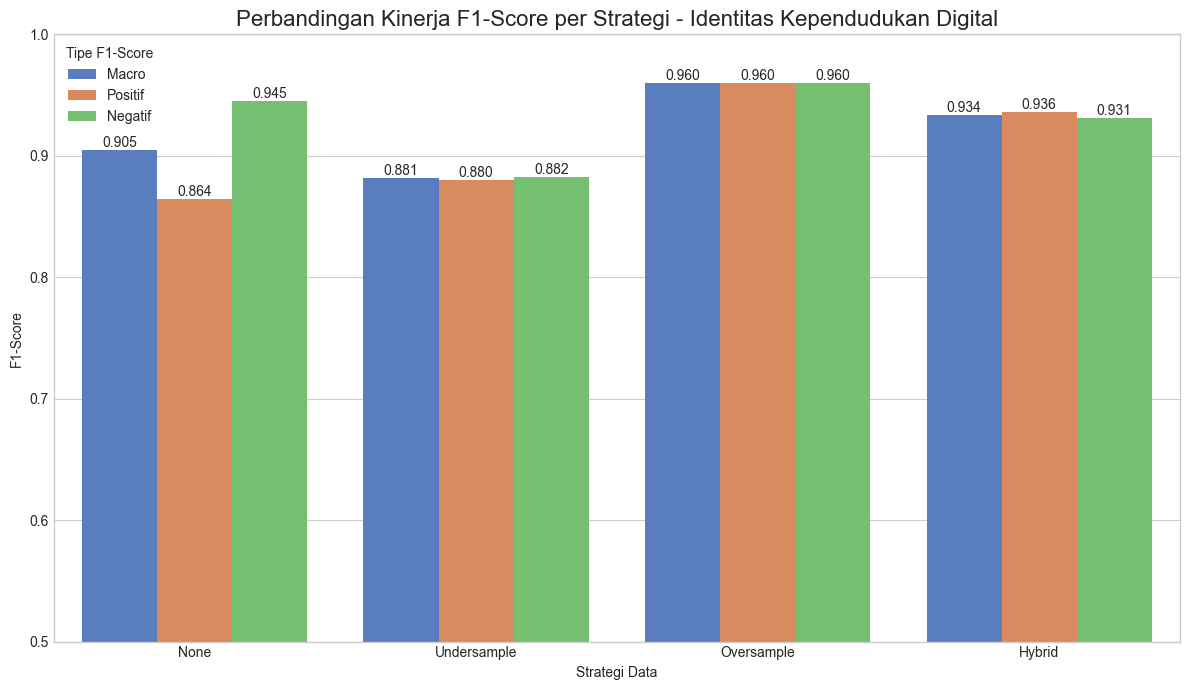


Visualisasi Confusion Matrix per Strategi



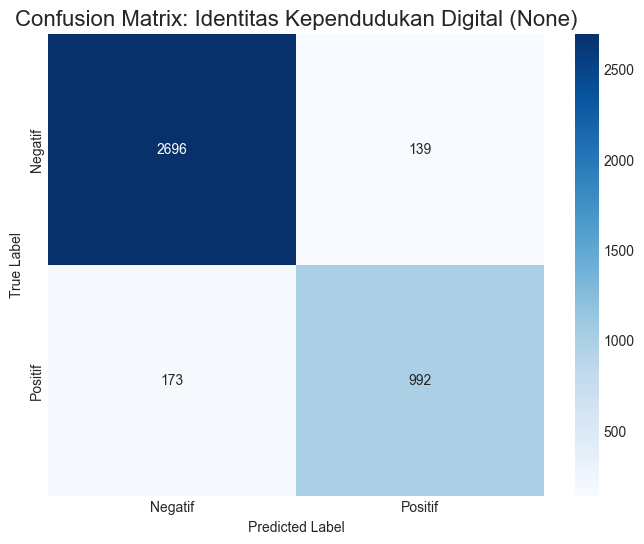

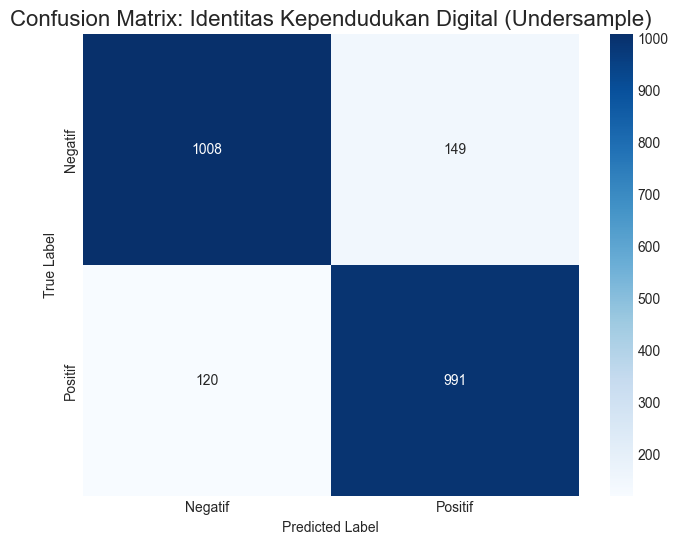

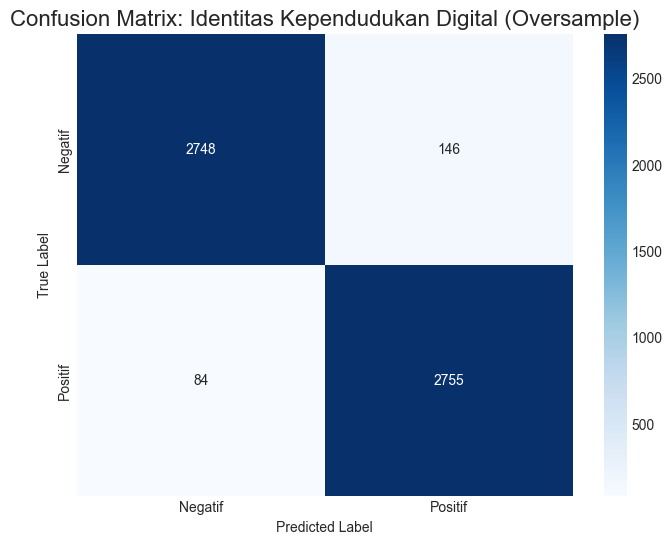

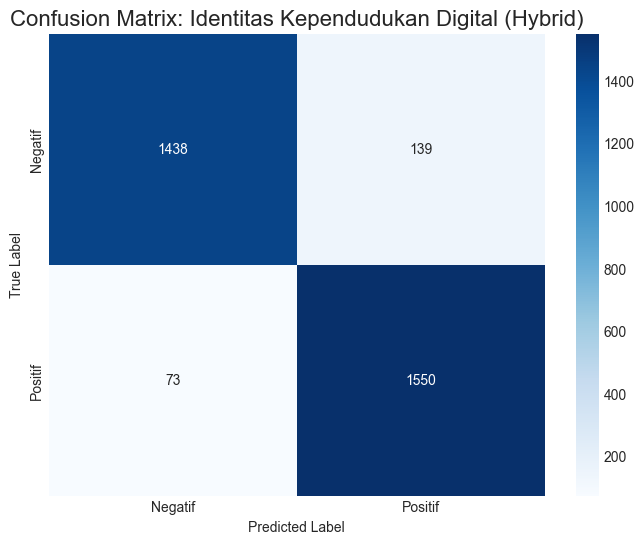


Tabel Hasil Komparatif Strategi Data



,Akurasi,F1-Score (Macro),Presisi (Macro),Recall (Macro),F1-Score (Positif),F1-Score (Negatif),F1-Score (Weighted),TN,FP,FN,TP
Strategi,,,,,,,,,,,
None,0.922,0.905,0.908,0.901,0.864,0.945,0.922,2696,139,173,992
Undersample,0.881,0.881,0.881,0.882,0.880,0.882,0.881,1008,149,120,991
Oversample,0.960,0.960,0.960,0.960,0.960,0.960,0.960,2748,146,84,2755
Hybrid,0.934,0.934,0.935,0.933,0.936,0.931,0.934,1438,139,73,1550


In [7]:
# Visualisasi

print(f"\n{'='*60}\nMembuat Visualisasi Komparatif Strategi Data\n{'='*60}\n")
plt.style.use('seaborn-v0_8-whitegrid')

# A. Visualisasi Perbandingan Kinerja (F1-Score Macro, Positif, Negatif)
results_list_plot = []
for strategy_name, metrics in all_evaluation_results.items():
    if metrics and 'report_dict' in metrics:
        report = metrics['report_dict']
        results_list_plot.append({
            'Strategi': strategy_name.replace("_", " ").title(), 
            'Tipe F1-Score': 'Macro', 'Skor': metrics.get('f1_macro', 0)
        })
        results_list_plot.append({
            'Strategi': strategy_name.replace("_", " ").title(), 
            'Tipe F1-Score': 'Positif', 'Skor': report['Positif']['f1-score']
        })
        results_list_plot.append({
            'Strategi': strategy_name.replace("_", " ").title(), 
            'Tipe F1-Score': 'Negatif', 'Skor': report['Negatif']['f1-score']
        })
df_plot_results = pd.DataFrame(results_list_plot)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_plot_results, x='Strategi', y='Skor', hue='Tipe F1-Score', palette='muted')
ax.set_title(f'Perbandingan Kinerja F1-Score per Strategi - {app_name}', fontsize=16)
ax.set_xlabel('Strategi Data')
ax.set_ylabel('F1-Score')
ax.set_ylim(0.5, 1.0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.tight_layout()
plt.savefig('strategy_performance_detailed_comparison.png', dpi=300)
plt.show()

# B. Visualisasi Confusion Matrix
print(f"\n{'='*60}\nVisualisasi Confusion Matrix per Strategi\n{'='*60}\n")
for strategy_name, metrics in all_evaluation_results.items():
    if metrics and 'confusion_matrix' in metrics:
        cm = metrics['confusion_matrix']
        title = f'Confusion Matrix: {app_name} ({strategy_name.replace("_", " ").title()})'
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
        plt.title(title, fontsize=16)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        
        safe_title = "".join(c for c in title if c.isalnum() or c in (' ', '_')).rstrip().replace(" ", "_")
        plt.savefig(f'cm_{safe_title}.png', dpi=300, bbox_inches='tight')
        plt.show()

# C. Membuat Tabel Hasil Akhir yang LENGKAP
final_results_list = []
for strategy_name, metrics in all_evaluation_results.items():
    if metrics and 'confusion_matrix' in metrics:
        report = metrics['report_dict']
        tn, fp, fn, tp = metrics['confusion_matrix'].ravel()
        res = {
            'Strategi': strategy_name.replace("_", " ").title(),
            'Akurasi': metrics.get('accuracy', 0),
            'F1-Score (Macro)': metrics.get('f1_macro', 0),
            'Presisi (Macro)': metrics.get('precision_macro', 0), # <- DITAMBAHKAN
            'Recall (Macro)': metrics.get('recall_macro', 0),   # <- DITAMBAHKAN
            'F1-Score (Positif)': report['Positif']['f1-score'],
            'F1-Score (Negatif)': report['Negatif']['f1-score'],
            'F1-Score (Weighted)': report['weighted avg']['f1-score'],
            'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp
        }
        final_results_list.append(res)

df_final_results = pd.DataFrame(final_results_list).set_index('Strategi')

# Tentukan kolom numerik untuk diformat
numeric_columns_float = [
    'Akurasi', 'F1-Score (Positif)', 'F1-Score (Negatif)',
    'F1-Score (Macro)', 'F1-Score (Weighted)', 
    'Presisi (Macro)', 'Recall (Macro)' # <- DITAMBAHKAN
]
numeric_columns_int = ['TN', 'FP', 'FN', 'TP']

# Beri gaya pada tabel
styled_df = df_final_results.style.format("{:.3f}", subset=numeric_columns_float)\
                                  .format("{:}", subset=numeric_columns_int)\
                                  .background_gradient(cmap='coolwarm', subset=numeric_columns_float)\
                                  .highlight_max(subset=['TN', 'TP', 'F1-Score (Positif)', 'F1-Score (Negatif)'], color='lightgreen')\
                                  .highlight_min(subset=['FP', 'FN'], color='salmon')

print(f"\n{'='*80}\n\033[1mTabel Hasil Komparatif Strategi Data\033[0m\n{'='*80}\n")
display(styled_df)